In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')

In [5]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

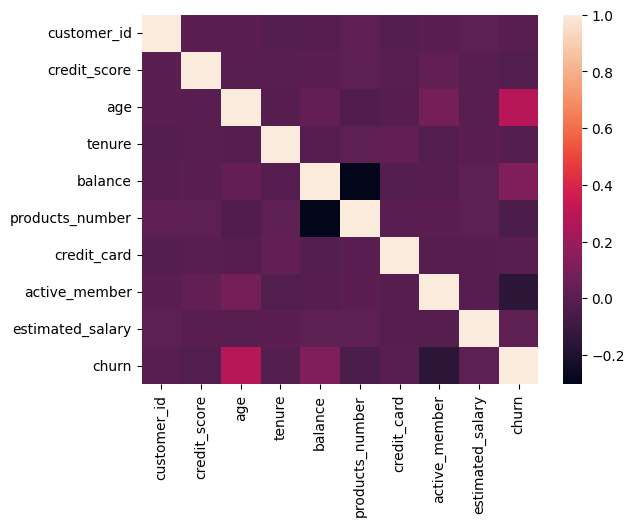

In [8]:
corr=data.corr(numeric_only=True)
sns.heatmap(corr)

<Axes: xlabel='age', ylabel='churn'>

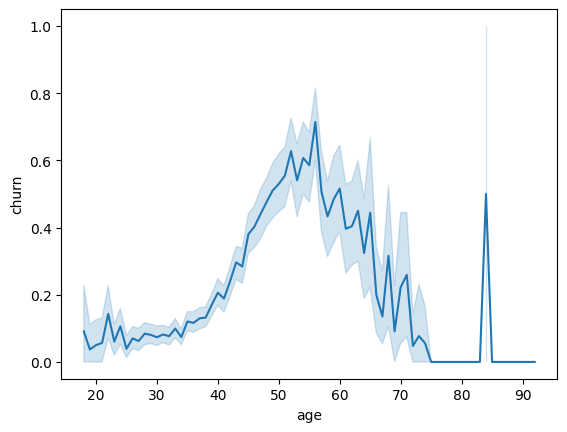

In [11]:
sns.lineplot(data=data, x="age", y="churn")


<Axes: xlabel='churn', ylabel='balance'>

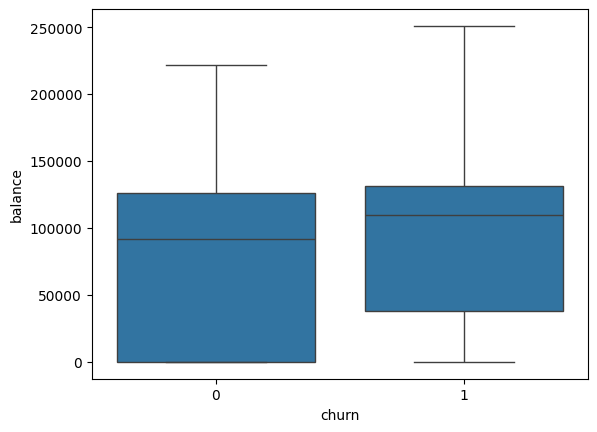

In [27]:
sns.boxplot(data=data, x="churn", y="balance")

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['encoded'] = encoder.fit_transform(data['gender'])
data[['churn', 'encoded']].head()


,churn,encoded
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0


In [15]:
data['encoded'].value_counts()

encoded
1    5457
0    4543
Name: count, dtype: int64

In [17]:
male = 0
female = 0
for i in range(len(data['encoded'])):
    if data['encoded'][i] == 1 and data['churn'][i] == 1:
        male += 1
    elif data['encoded'][i] == 0 and data['churn'][i] == 1:
        female += 1
print("Number of females who churned:", female)
print("Number of males who churned:", male)

Number of females who churned: 1139
Number of males who churned: 898


<Axes: xlabel='churn', ylabel='credit_score'>

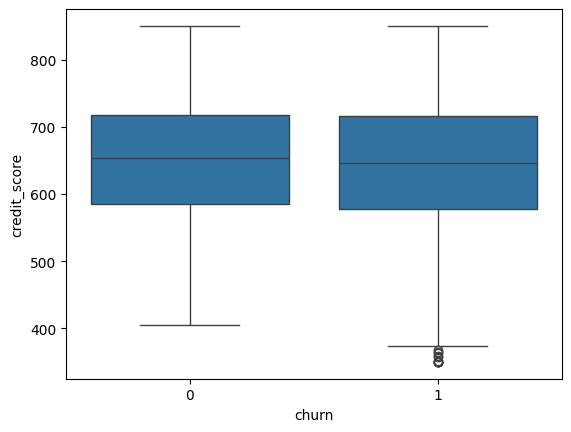

In [18]:
sns.boxplot(x='churn', y='credit_score', data=data)


<Axes: xlabel='country', ylabel='count'>

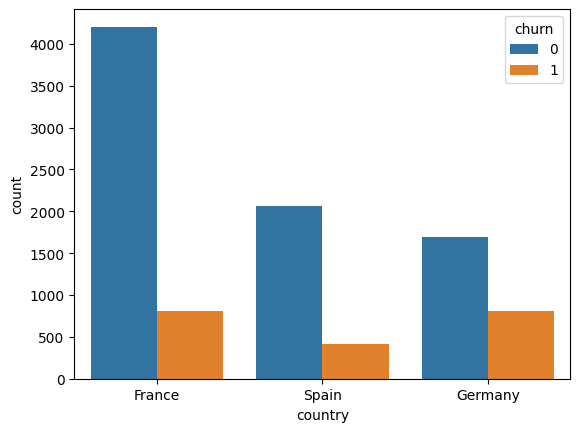

In [19]:
sns.countplot(x='country', hue='churn', data=data)


In [20]:
#one hot encoding the 'country' column
data = pd.get_dummies(data, columns=['country'], drop_first=True)
data.head()

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,encoded,country_Germany,country_Spain
0,15634602,619,Female,42,2,0.00,1,1,1,101348.88,1,0,False,False
1,15647311,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,False,True
2,15619304,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,False,False
3,15701354,699,Female,39,1,0.00,2,0,0,93826.63,0,0,False,False
4,15737888,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,False,True


<Axes: xlabel='churn', ylabel='tenure'>

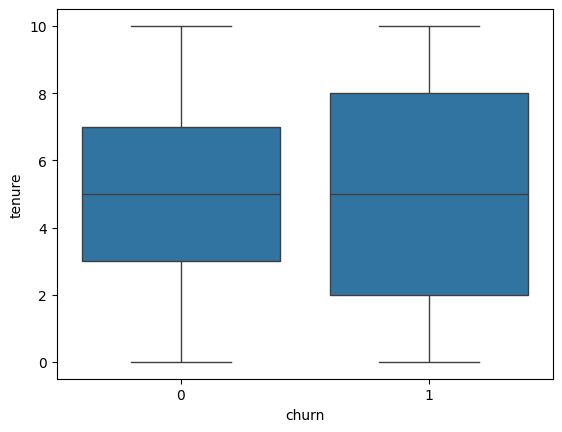

In [21]:
sns.boxplot(x='churn', y='tenure', data=data)



<Axes: xlabel='products_number', ylabel='count'>

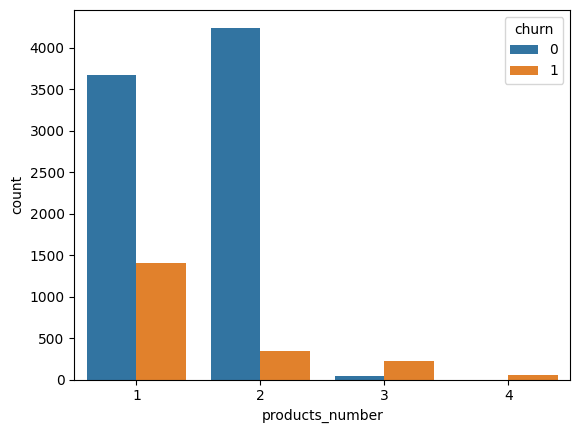

In [22]:
sns.countplot(x='products_number', hue='churn', data=data)


<Axes: xlabel='credit_card', ylabel='count'>

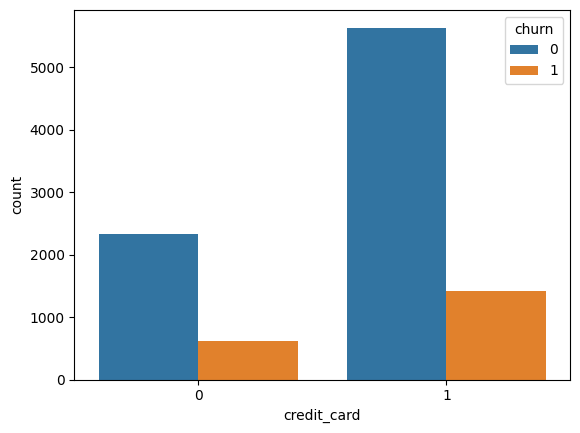

In [23]:
sns.countplot(x='credit_card', hue='churn', data=data)


<Axes: xlabel='active_member', ylabel='count'>

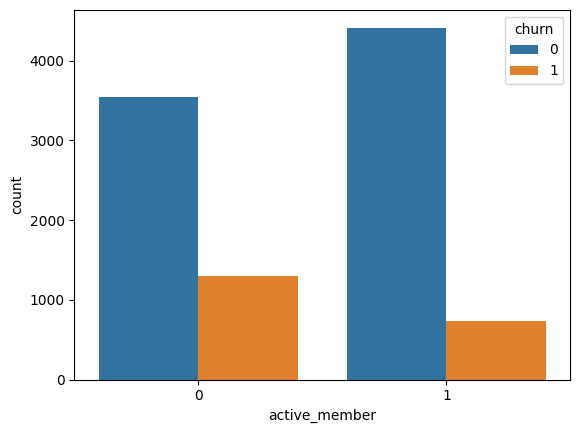

In [24]:
sns.countplot(x='active_member', hue='churn', data=data)


<Axes: xlabel='churn', ylabel='estimated_salary'>

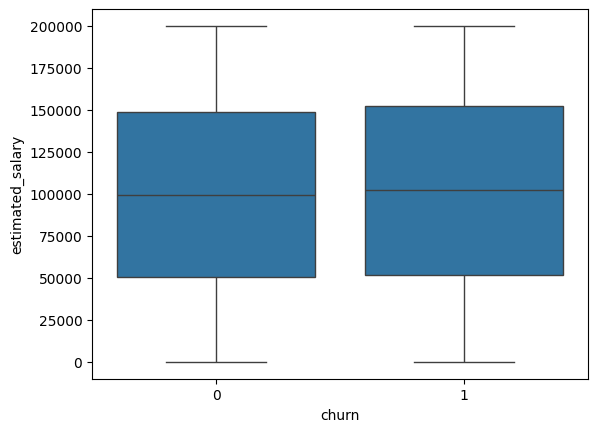

In [25]:
sns.boxplot(x='churn', y='estimated_salary', data=data)


In [151]:
X = data[['age', 'credit_score', 'encoded', 'products_number',
          'active_member',  'balance', 'credit_card', 'estimated_salary',
          'country_Germany', 'country_Spain']]
y = data['churn']


In [165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaling = StandardScaler()
scaling.fit(X_train)

model = LogisticRegression(max_iter=1000000000)
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.832